In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression

In [43]:
cir=pd.read_csv('Assignment_Central_India_Rainfall_1901_2016.csv')

In [44]:
cir.head(29)

YEAR  ...  Actual Rainfall: JUN-SEPT
0   1901  ...                      863.3
1   1902  ...                      850.0
2   1903  ...                      987.1
3   1904  ...                      806.3
4   1905  ...                      783.4
5   1906  ...                     1009.9
6   1907  ...                      906.0
7   1908  ...                     1071.0
8   1909  ...                      946.0
9   1910  ...                     1054.3
10  1911  ...                      809.0
11  1912  ...                      950.4
12  1913  ...                      938.8
13  1914  ...                     1119.9
14  1915  ...                      844.8
15  1916  ...                     1077.5
16  1917  ...                     1174.7
17  1918  ...                      679.9
18  1919  ...                     1119.7
19  1920  ...                      760.1
20  1921  ...                      999.8
21  1922  ...                      954.6
22  1923  ...                      934.3
23  1924  ...                      883.0
24  1925  ...                      939.8
25  1926  ...                     1115.3
26  1927  ...                     1030.7
27  1928  ...                      962.4
28  1929  ...                      930.3

[29 rows x 6 columns]

In [45]:
cir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YEAR                       116 non-null    int64  
 1   Actual Rainfall: JUN       116 non-null    float64
 2   Actual Rainfall: JUL       116 non-null    float64
 3   Actual Rainfall: AUG       116 non-null    float64
 4   Actual Rainfall: SEPT      116 non-null    float64
 5   Actual Rainfall: JUN-SEPT  116 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 5.6 KB


In [46]:
cir.isnull().sum()

YEAR                         0
Actual Rainfall: JUN         0
Actual Rainfall: JUL         0
Actual Rainfall: AUG         0
Actual Rainfall: SEPT        0
Actual Rainfall: JUN-SEPT    0
dtype: int64

In [47]:
print(cir['Actual Rainfall: JUL'].max())
print(cir['Actual Rainfall: JUL'].min())

523.8
91.8


In [48]:
print(cir['Actual Rainfall: JUN'].max())
print(cir['Actual Rainfall: JUN'].min())

303.7
43.6


In [49]:
print(cir['Actual Rainfall: AUG'].max())
print(cir['Actual Rainfall: AUG'].min())

465.0
169.8


In [50]:
print(cir['Actual Rainfall: SEPT'].max())
print(cir['Actual Rainfall: SEPT'].min())

366.3
53.9


In [51]:
cir[['YEAR','Actual Rainfall: JUN-SEPT']].groupby('Actual Rainfall: JUN-SEPT').min()

YEAR
Actual Rainfall: JUN-SEPT      
679.9                      1918
683.6                      1987
703.2                      1974
754.9                      1972
760.1                      1920
...                         ...
1193.4                     2013
1202.7                     1933
1207.2                     1959
1294.1                     1961
1349.4                     1994

[111 rows x 1 columns]

In [52]:
cir.sort_values(by='Actual Rainfall: JUN-SEPT', ascending=True)

YEAR  ...  Actual Rainfall: JUN-SEPT
17   1918  ...                      679.9
86   1987  ...                      683.6
73   1974  ...                      703.2
71   1972  ...                      754.9
19   1920  ...                      760.1
..    ...  ...                        ...
112  2013  ...                     1193.4
32   1933  ...                     1202.7
58   1959  ...                     1207.2
60   1961  ...                     1294.1
93   1994  ...                     1349.4

[116 rows x 6 columns]

### Data Visualisation

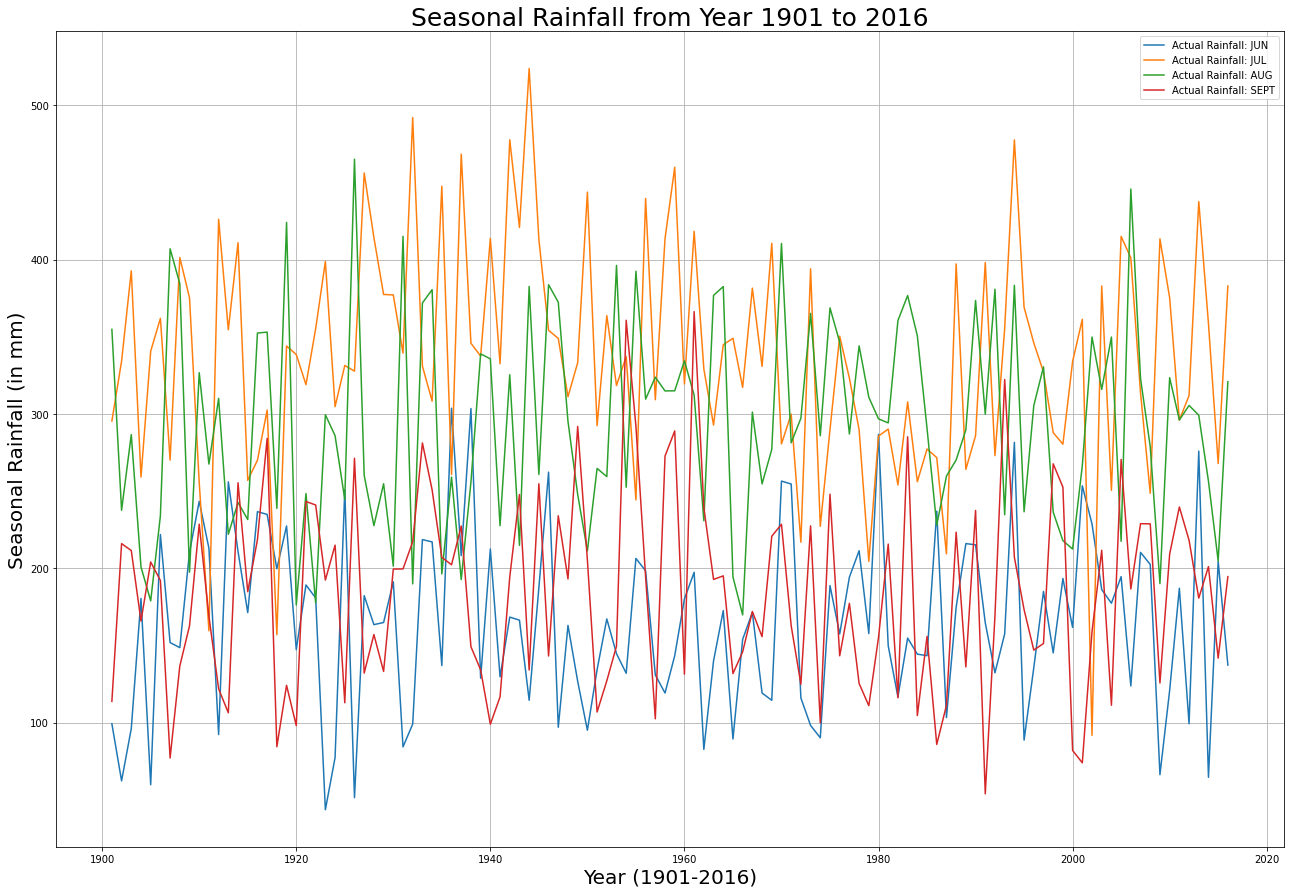

In [53]:
cir[['YEAR','Actual Rainfall: JUN', 'Actual Rainfall: JUL','Actual Rainfall: AUG', 'Actual Rainfall: SEPT']].groupby("YEAR").mean().plot(figsize=(22,15))
plt.xlabel('Year (1901-2016)',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall from Year 1901 to 2016',fontsize=25)
plt.grid()

In the above figure, I have seen that the rainfall or monsoon season started from the June months with little rainfall in comparison to rest of monsoon 
months. The minimum rainfall occur in month on June in the year of 1923 and maximum was in 1937. In the graph we clearly seen that major proportion of rainfall occur in month on July.

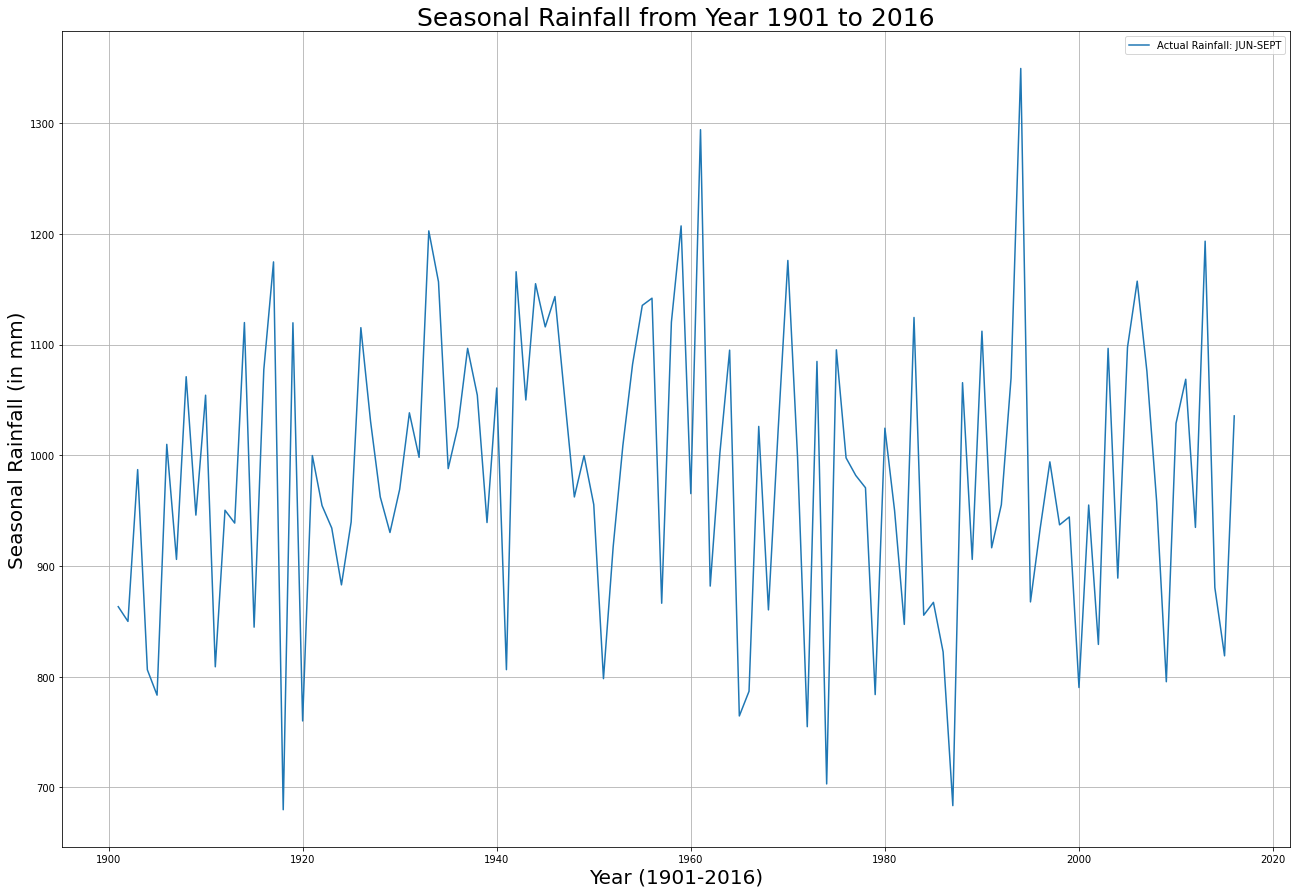

In [54]:
cir[['YEAR','Actual Rainfall: JUN-SEPT']].groupby("YEAR").mean().plot(figsize=(22,15));
plt.xlabel('Year (1901-2016)',fontsize=20)
plt.ylabel('Seasonal Rainfall (in mm)',fontsize=20)
plt.title('Seasonal Rainfall from Year 1901 to 2016',fontsize=25)
plt.grid()


If we see the overall rainfall betwenn June and September, the minimum amount of rainfall occur in the year of 1918 with 679.9mm of rainfall, and maximum was in the year of 1994 with 1349.4mm of rainfall. In the graph we can seen that there were lesser amount of rainfall in between 1920 and 1940.

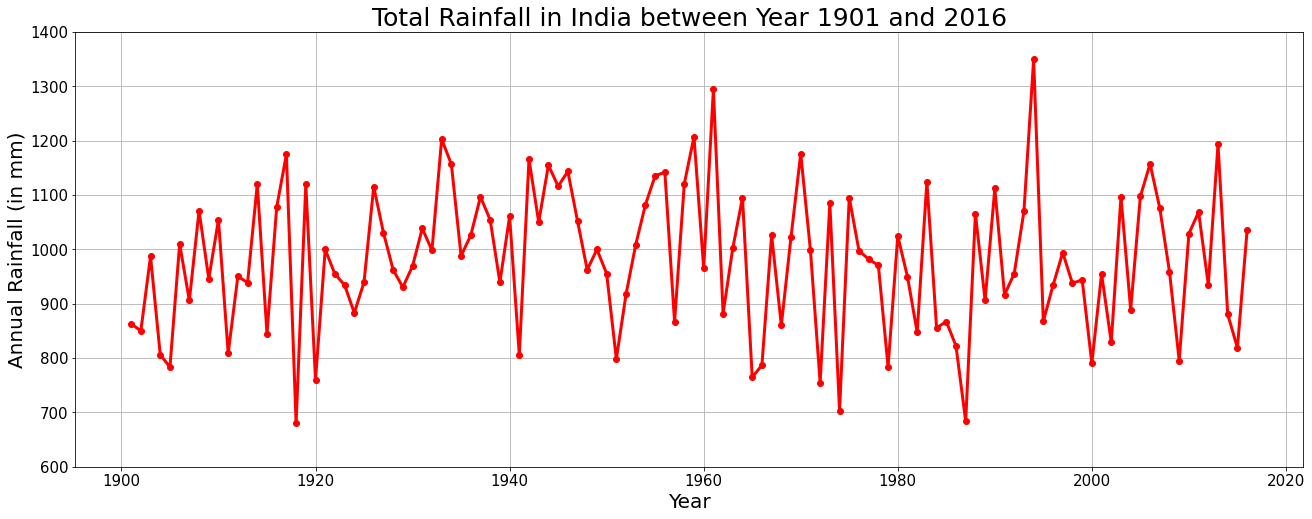

In [55]:
graph1=cir.groupby("YEAR").mean()['Actual Rainfall: JUN-SEPT'].plot(ylim=(600,1400),color='red',marker='o',linestyle='-',linewidth=3,figsize=(22,8));
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Total Rainfall in India between Year 1901 and 2016',fontsize=25)
graph1.tick_params(labelsize=15)
plt.grid()

In above graph the rainfall occur in the month of Jun, July, August and September. Sometime high rainfall occur and sometimes low. In graph we didn't find that any year which having no rainfall. The maximum rainfall occur in year of 1994 and minimum is in 1918 and 1987.

In [56]:
cir.loc[cir.YEAR==2013]

YEAR  ...  Actual Rainfall: JUN-SEPT
112  2013  ...                     1193.4

[1 rows x 6 columns]

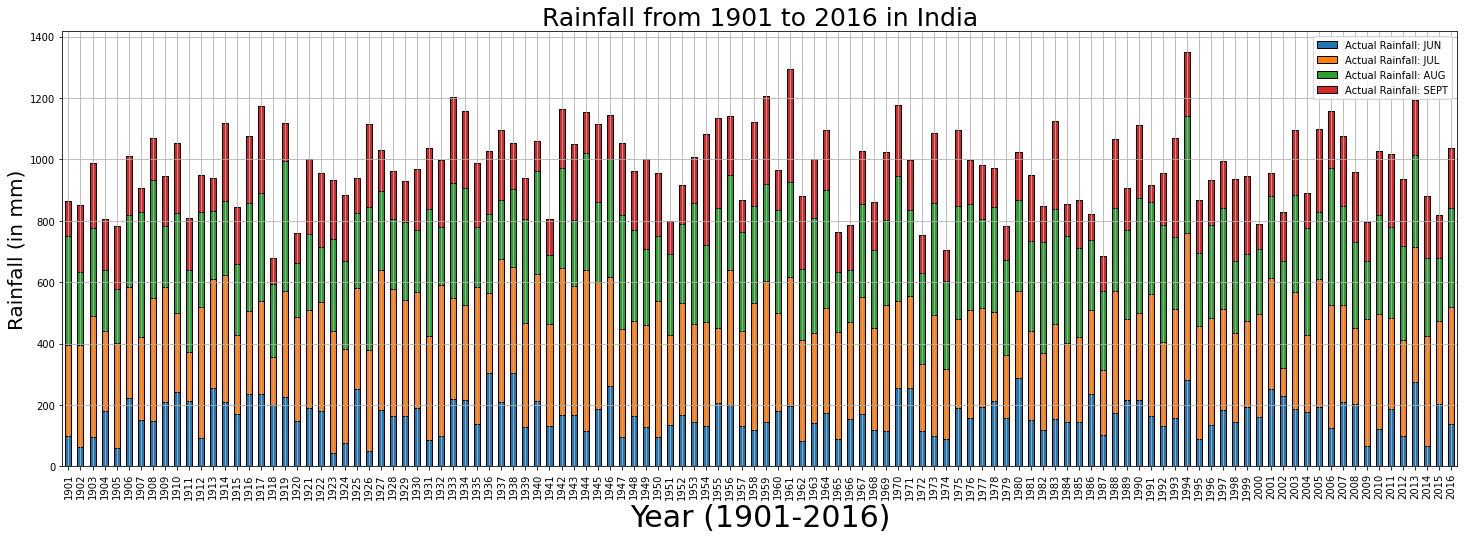

In [57]:
cir[['YEAR', 'Actual Rainfall: JUN', 'Actual Rainfall: JUL',
       'Actual Rainfall: AUG','Actual Rainfall: SEPT']].groupby("YEAR").mean().sort_values('YEAR').plot.bar(width=0.5,edgecolor='k',stacked=True,figsize=(25,8));
plt.xlabel('Year (1901-2016)',fontsize=30)
plt.ylabel('Rainfall (in mm)',fontsize=20)
plt.title('Rainfall from 1901 to 2016 in India',fontsize=25)
plt.grid()


This graph clearly depicts the rainfall occur in all four months of every year. In this graph clearly shows that there were no sudden or sharp rise in increase or decrease in rainfall. Which is good sign in terms of global warming. As there is no such effect can be seen of Global Warming.

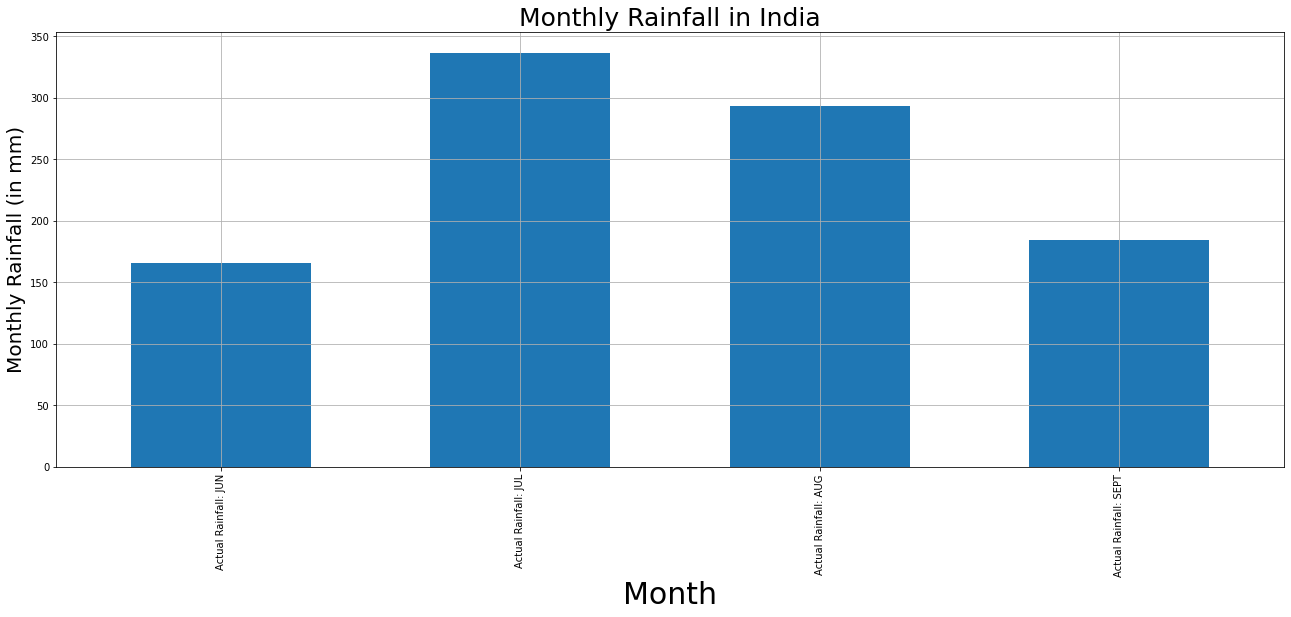

In [58]:
graph=cir[['Actual Rainfall: JUN', 'Actual Rainfall: JUL','Actual Rainfall: AUG','Actual Rainfall: SEPT']].mean().plot.bar(width=0.6,linewidth=2,figsize=(22,8))
plt.xlabel('Month',fontsize=30)
plt.ylabel('Monthly Rainfall (in mm)',fontsize=20)
plt.title('Monthly Rainfall in India',fontsize=25)
plt.grid()

Above graph is the mean value of the each month from 1901 to 2016.It tells that which month has high amount of rainfall. In graph it shows that rain starting from June month with little rainfall, after that maximum amount of rainfall can be seen in the month of July, which is most. Then slighly decreses in month of August and Septermber, which is end of the monsoon season.

### Splitting the data in Training and Testing

In [59]:
x=cir.drop(['Actual Rainfall: JUN-SEPT'], axis=1).values
y=cir['Actual Rainfall: JUN-SEPT'].values

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30, random_state=42)

## Linear Regression

In [61]:
lr1=LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
y_pred1=lr1.predict(x_test)
y_pred1[0:5]

array([ 855.68657957,  783.3712355 , 1049.89412577,  806.49122555,
        809.01066186])

In [63]:
accuracy = lr1.score(x_test,y_test)
print(accuracy*100,'%')

99.51181580098913 %


## K Nearest Neighbour Algorithms

In [64]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()   

In [65]:
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test) 

In [66]:
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [67]:
y_pred= knn.predict(x_test)  

In [68]:
y_pred[0:5]

array([ 847.3,  850. , 1116. ,  798.3,  679.9])

In [69]:
y_test[0:5]

array([ 855.6,  783.4, 1050. ,  806.4,  809. ])

In [70]:
knn.score(x_test, y_test)

0.751256338079924

In [71]:
k_range = range(1, 31)
values = []
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    values.append(knn.score(x_test, y_test))
print(values)

[0.751256338079924, 0.6950435314477601, 0.6627927719409311, 0.6715062873377851, 0.702369215700483, 0.7103409696062071, 0.6907482626354244, 0.6895430664646907, 0.6906504734171326, 0.672899301712723, 0.6742585770729062, 0.6592079105781437, 0.66361264887276, 0.669070521793584, 0.6640996016206611, 0.6510895770162051, 0.6433347426509832, 0.651862868652447, 0.6646376594493473, 0.6527453118871136, 0.6320349411520194, 0.6236319385692382, 0.613523479090636, 0.6145784858652253, 0.6215284576941695, 0.6247877773749111, 0.617299762387588, 0.6071338700122308, 0.6103400340417855, 0.6030846971597663]


Text(0, 0.5, 'Testing Accuracy')

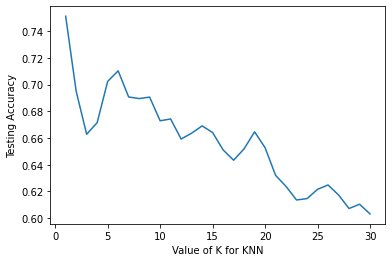

In [72]:
plt.plot(k_range, values)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

When I increase the 'n_neighbor' value from 1 to onwards, the accuracy started decreasing.